<a href="https://colab.research.google.com/github/antonior-hub/Analista-de-Dados-/blob/main/Semana_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ELT574 - Aprendizado de Máquinas**
**Curso de Especialização em Inteligência Artificial e Computacional**



## Semana 2 - Redes Neurais Artificiais

Preparação do ambiente de programação e importação das principais bibliotecas.

In [ ]:
#Importando as bibliotecas para análise do problema e configurando o notebook

## OS para executar comandos de diretorio
import os

## Habilitar Google Drive no Colab
# from google.colab import drive
# drive.mount('/content/drive')

## NumPy para manipular matrizes e vetores
import numpy as np

## Pandas para manipular os dataframes
import pandas as pd

## Plotar figuras bonitas
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import seaborn as sns

print('Setup completo!')

Setup completo!


### Aula 01 e 02 - Introdução às Redes Neurais Artificiais -- Perceptron e Adaline

#### Perceptron

*Classificar as espécies de flores de íris.* Uma das classes é linearmente separável das outras duas classes. Estas últimas não são linearmente separáveis.

Fonte: https://archive.ics.uci.edu/ml/datasets/iris

In [ ]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

*Variáveis do banco de dados:*

1. petal length in cm
2. petal width in cm
3. class:
  - Iris Setosa (0)
  - Iris Versicolour (1)



In [ ]:
from sklearn.linear_model import Perceptron

per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
#max_iter = epoca_max; tol = limiar de precisao; random_state = sempre os mesmos pesos no sorteio
per_clf.fit(X, y)
print('Perceptron treinado!')
print('Os pesos encontrados foram {} e o bias foi {}.'.format(per_clf.coef_, per_clf.intercept_))

y_pred = per_clf.predict([[2, 0.5]])
y_pred

Perceptron treinado!
Os pesos encontrados foram [[1.5 2.2]] e o bias foi [-5.].


array([0])

Perceptron treinado!
Os pesos encontrados foram [[0.9 1.7]] e o bias foi [-3.].


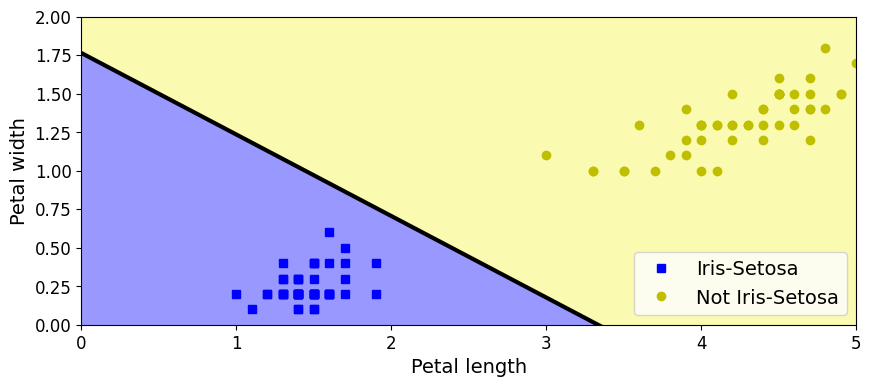

In [ ]:
per_clf = Perceptron(max_iter=2000, tol=1e-3)
#max_iter = epoca_max; tol = limiar de precisao
per_clf.fit(X, y)
print('Perceptron treinado!')
print('Os pesos encontrados foram {} e o bias foi {}.'.format(per_clf.coef_, per_clf.intercept_))

a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Not Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

plt.show()

### Aula 03 - Redes perceptron multicamadas (classificação)

Construindo modelos de rede perceptron multicamadas com a biblioteca Keras do TensorFlow

In [ ]:
import tensorflow as tf
from tensorflow import keras

##### Classificador de imagens com Keras

Vamos utilizar o dataset fashion MNIST. O MNIST é um dataset de imagens para problemas de classificação multiclasse.

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

Este dataset já contem os dados de treinamento e teste separados. O dataset de treinamento é composto por 60.000 imagens com 28x28 pixels.

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
X_train_full.shape

(60000, 28, 28)

Já o dataset de teste é composto por 10.000 imagens de 28x28 pixels.

In [ ]:
X_test.shape

(10000, 28, 28)

Cada pixel das imagens é representado por um valor em escala de cinza, que vai de 0 a 255. O tipo das entradas é inteira, sem sinal, de 8 bits.

In [ ]:
X_train_full.dtype

dtype('uint8')

###### Separando os dados para validação durante o treinamento

Vamos dividir o dataset de treinamento para separmos um conjunto de validação que será utilizado durante o treinamento. Como o valor máximo de cada pixel pode ser 255, vamos normalizar o valor dos pixels para um valor float entre 0 e 1.

In [ ]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255. #o ponto em 255. caracteriza a conversao para float
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

Podemos plotar as imagens do dataset utilizando o `imshow()` da biblioteca `matplotlib` com a cor em escala de cinza (mapeamento binário, `'binary'`).





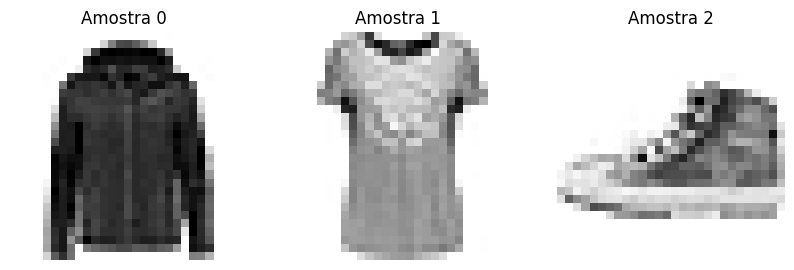

In [ ]:
plt.figure(figsize=(10,4))
plt.subplot(131)
plt.imshow(X_train[0], cmap="binary")
plt.title('Amostra 0')
plt.axis('off')

plt.subplot(132)
plt.imshow(X_train[1], cmap="binary")
plt.title('Amostra 1')
plt.axis('off')

plt.subplot(133)
plt.imshow(X_train[2], cmap="binary")
plt.title('Amostra 2')
plt.axis('off')
plt.show()

Repare abaixo que os valores armazenados para o rótulo das classes são valores numéricos. Cada classe possui um número que representa:

0. T-shirt/top
1. Trouser
2. Pullover
3. Dress
4. Coat
5. Sandal
6. Shirt
7. Sneaker
8. Bag
9. Ankle boot




In [ ]:
print(y_train)
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

[4 0 7 ... 3 0 5]


Sendo assim, a primeira imagem do dataset de treinamento é:

In [ ]:
class_names[y_train[0]]

'Coat'

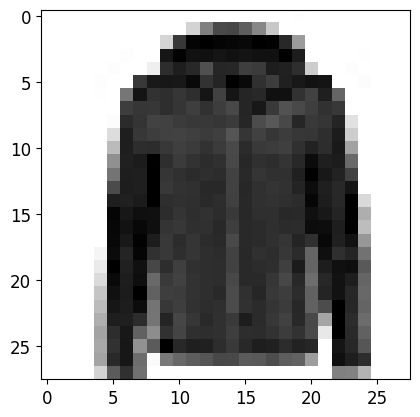

In [ ]:
plt.imshow(X_train[0], cmap="binary")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_y = pd.DataFrame(y_train)

In [ ]:
df_y.value_counts()

,count
0,
0,5543
4,5512
8,5510
6,5507
5,5507
3,5499
2,5496
9,5494
7,5488


Algumas das imagens do dataset de treinamento:

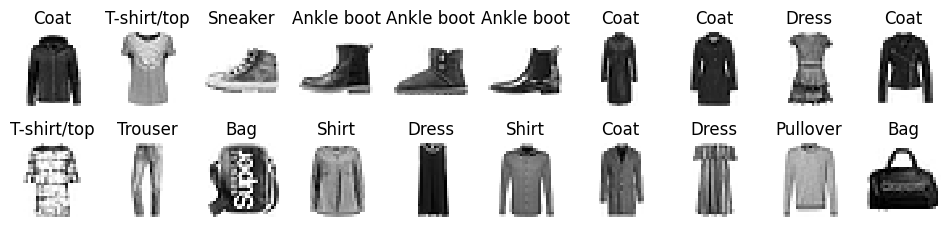

In [ ]:
n_rows = 2
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

###### Criando o modelo de PMC

Vamos criar um modelo de PMC para classificar as amostras! Como é um problema com imagens, vamos ajustar uma rede com duas camadas escondidas.

In [ ]:
# Criando o modelo de PMC
## Declaracao do modelo sequencial para o Keras
model = keras.models.Sequential()
## Camada de entrada (flatten transforma a imagem 28x28 em um vetor 1D de 784 valores)
model.add(keras.layers.Flatten(input_shape=[28, 28]))
## Primeira camada escondida, com 300 neuronios e funcao de ativacao ReLU;
### Cada camada 'Dense' gerencia seus proprios parametros, incluindo bias
model.add(keras.layers.Dense(300, activation="relu"))
## Segunda camada escondida, com 100 neuronios e ReLU
model.add(keras.layers.Dense(100, activation="relu"))
## Camada de saida com 10 neuronios e funcao de ativacao softmax (multiclasse)
model.add(keras.layers.Dense(10, activation="softmax"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Outra maneira de declarar o modelo sequencial com Keras poderia ser:

In [ ]:
model = keras.models.Sequential([
  keras.layers.Flatten(input_shape=[28, 28]),
  keras.layers.Dense(300, activation="relu"),
  keras.layers.Dense(100, activation="relu"),
  keras.layers.Dense(10, activation="softmax")
])

A estrutura do modelo pode ser verificada por:

In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

E as camadas do modelo por:

In [ ]:
model.layers

[<Flatten name=flatten_3, built=True>,
 <Dense name=dense_9, built=True>,
 <Dense name=dense_10, built=True>,
 <Dense name=dense_11, built=True>]

Podemos atribuir uma camada a uma variável para manipular os parâmetros da camada.

In [ ]:
hidden1 = model.layers[1]
hidden1

<Dense name=dense_9, built=True>

Os parâmetros de cada camada podem ser acessados e alterados com os métodos `get_weights()` e `set_weights()`

In [ ]:
weights, biases = hidden1.get_weights()
weights

array([[-0.06197661, -0.03016592,  0.01703927, ..., -0.04428142,
        -0.01148655, -0.04858602],
       [-0.05939368,  0.06609131,  0.06830035, ...,  0.02333698,
         0.05700381, -0.03482991],
       [ 0.02824308, -0.06982286,  0.07199667, ...,  0.01662991,
        -0.04263428, -0.0391911 ],
       ...,
       [ 0.06594615, -0.07118582, -0.01803842, ..., -0.0194522 ,
        -0.01694816, -0.00861304],
       [ 0.0342053 ,  0.0269839 ,  0.02819948, ...,  0.05931479,
         0.0043726 ,  0.04563364],
       [ 0.02608585, -0.03909407,  0.07116166, ..., -0.005045  ,
        -0.01035531, -0.04839708]], dtype=float32)

In [ ]:
weights.shape

(784, 300)

In [ ]:
biases.shape

(300,)

A finalização do modelo é feita compilando as últimas informações que devem ser repassadas à estrutura do PMC, a função de otimização, o otimizador e o indicador de métrica.

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

A função de otimização `'sparse_categorical_crossentropy'` é utilizada porque cada saída está rolutada de 0 a 9. Se fosse um vetor dummy (`[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]`), poderíamos utilizar a função `'categorical_crossentropy'`.

Se fosse um problema de classificação binária, utilizaríamos a função `'binary_crossentropy'` e a função de ativação `'sigmoid'` como função de ativação na camada de saída.

###### Treinando o modelo de PMC

O treinamento do modelo é feito utilizando o método `'fit()'` para a classe model.

In [ ]:
# dados
# instanciar o modelo
# treinar
# avaliar

In [ ]:
history = model.fit(X_train,y_train, epochs=30,
                    validation_data=(X_valid,y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6832 - loss: 1.0139 - val_accuracy: 0.8274 - val_loss: 0.5130
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8203 - loss: 0.5130 - val_accuracy: 0.8360 - val_loss: 0.4643
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8407 - loss: 0.4505 - val_accuracy: 0.8554 - val_loss: 0.4143
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8505 - loss: 0.4209 - val_accuracy: 0.8588 - val_loss: 0.4049
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8565 - loss: 0.4019 - val_accuracy: 0.8662 - val_loss: 0.3876
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8669 - loss: 0.3776 - val_accuracy: 0.8680 - val_loss: 0.3840
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8728 - loss: 0.3635 - val_accuracy: 0.8696 - val_loss: 0.3717
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8754 - loss: 0.3540

Outra forma de dividir o dataset para treinamento e validação (ao invés de usar o argumento `validation_data`) é utilizar o argumento `validation_split=0.1` para passar a quantidade de dados que devem ser utilizados para a validação durante a fase de treinamento.

###### Analisando os resultados do treinamento

O treinamento do modelo armazenou o histórico de todas as épocas no dicionário `history`. Podemos transformar este dicionário em um DataFrame do Pandas e manipular os dados dele para identificar o melhor modelo treinado.

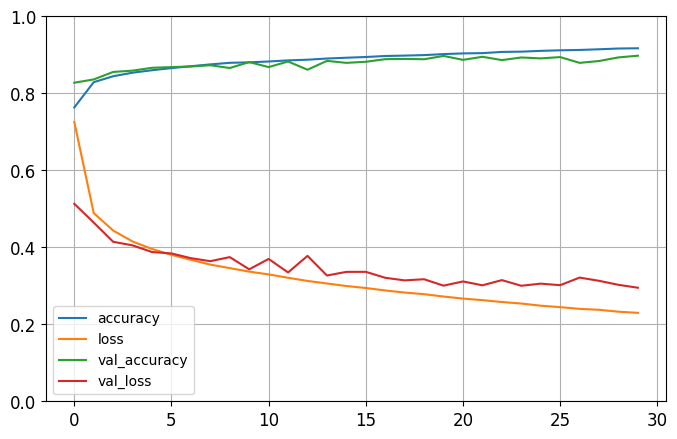

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1) # ajusta o eixo y para os limites de 0 a 1
plt.show()

Conseguimos um bom desempenho com este modelo e sem uma tendência de overfitting. Podemos ver isto porque o `loss` e o `val_loss`continuam diminuindo, apesar do `val_loss` estar com uma inclinação quase nula no final da última época treinada. Se o modelo continuasse o ajuste dos parâmetros, o `loss` continuaria descendo, mas, provavelmente, o `val_accuraccy` deixaria de acompanhar o `accuraccy` de treinamento.

Se o comportamento do modelo não foi satisfatório ainda depois do treinamento, podemos alterar os hiperparâmetros de treinamento, começando pela taxa de aprendizagem, o otimizador, número de camadas, número de neurônios por camada e os tipos de função de ativação.

Uma vez satisfeito com o modelo, podemos utilizar o dataset de teste para verificar mais uma vez o desempenho do PMC.

In [ ]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8844 - loss: 0.3302


[0.32619941234588623, 0.8855999708175659]

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
confusion_matrix(y_test, np.argmax(y_pred,axis=1))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[868,   2,  13,  27,   4,   2,  74,   0,  10,   0],
       [  2, 972,   0,  21,   3,   0,   2,   0,   0,   0],
       [ 19,   2, 818,  14,  81,   1,  63,   0,   2,   0],
       [ 23,   8,  10, 911,  22,   0,  21,   0,   5,   0],
       [  1,   3,  96,  43, 795,   0,  56,   1,   5,   0],
       [  0,   0,   0,   1,   0, 968,   0,  16,   1,  14],
       [142,   2,  86,  33,  62,   1, 663,   0,  11,   0],
       [  0,   0,   0,   0,   0,  34,   0, 947,   1,  18],
       [  7,   0,   3,   7,   3,   4,   4,   4, 968,   0],
       [  1,   0,   0,   0,   0,  15,   0,  38,   0, 946]])

In [ ]:
## matriz de confusão

print("Matrix de confusão")
plt.show()

corrMatrix = X_test[used_features].corr()
plt.matshow(corrMatrix)
plt.show()

f = plt.figure(figsize=(10, 10))
plt.matshow(corrMatrix, fignum=f.number)
plt.xticks(range(X_test[used_features].shape[1]), X_test[used_features].columns, fontsize=10, rotation=90)
plt.yticks(range(X_test[used_features].shape[1]), X_test[used_features].columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)


Matrix de confusão


NameError: name 'used_features' is not defined

###### Utilizando o modelo para fazer predições

Acertado o modelo, podemos começar a fazer predições para aplicação. Vamos tomar algumas amostras do dataset de teste para verificar as predições.

In [ ]:
X_new = X_test
y_proba = model.predict(X_new)
y_proba.round(5)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.3770e-02, 3.9000e-04,
        9.7013e-01],
       [2.0000e-04, 0.0000e+00, 9.9792e-01, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [0.0000e+00, 1.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       ...,
       [5.2000e-04, 0.0000e+00, 2.4000e-04, ..., 0.0000e+00, 9.9878e-01,
        0.0000e+00],
       [0.0000e+00, 9.9984e-01, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.0000e-05, 1.0000e-05, 9.0000e-05, ..., 4.9300e-03, 3.1000e-04,
        2.0000e-05]], dtype=float32)

In [ ]:
for i in y_proba:
  print(i.round(3))

A saída de streaming foi truncada nas últimas 5000 linhas.
[0.001 0.    0.974 0.    0.008 0.    0.017 0.    0.    0.   ]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0.525 0.    0.005 0.    0.007 0.    0.326 0.    0.137 0.   ]
[0.    0.    0.009 0.    0.991 0.    0.    0.    0.    0.   ]
[0.    0.    0.014 0.    0.418 0.    0.568 0.    0.    0.   ]
[0.003 0.011 0.001 0.977 0.001 0.001 0.002 0.    0.003 0.001]
[0.002 0.013 0.003 0.934 0.045 0.    0.001 0.    0.002 0.   ]
[0.    0.    0.    0.    0.    0.    0.    0.001 0.    0.999]
[0.002 0.013 0.075 0.013 0.891 0.    0.001 0.    0.005 0.   ]
[0.    0.    0.    0.    0.    0.    0.    0.947 0.    0.053]
[0.997 0.    0.    0.    0.    0.    0.003 0.    0.    0.   ]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[0.021 0.001 0.008 0.875 0.046 0.001 0.014 0.    0.032 0.001]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0.39  0.061 0.004 0.092 0.    0.    0.452 0.    0.    0.   ]
[0.042 0.071 0.107 0.011 0.765 0.    0.003 0.    0.    0.   ]
[0.986 0.    0.    0.    0.    0.    0.

In [ ]:
list(y_test[:3])

[np.uint8(9), np.uint8(2), np.uint8(1)]

In [ ]:
y_pred = np.argmax(y_proba,axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [ ]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser', ..., 'Bag', 'Trouser',
       'Sandal'], dtype='<U11')

In [ ]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

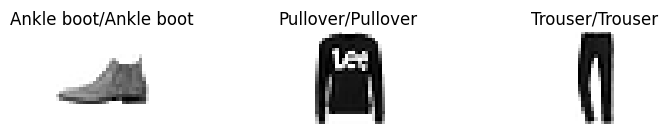

In [ ]:
n_rows = 1
n_cols = 3
plt.figure(figsize=(n_cols * 3, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_test[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_test[index]] + '/' + class_names[y_pred[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()